In [1]:
#imports 

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pandas_datareader
import pandas_datareader.data as web
import yahoofinancials
import yfinance as yf
import datetime

from pandas_datareader import data as pdr
from pandas_datareader import wb
from datetime import date
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')

## Get historical MSFT prices for a period

In [3]:
msft = yf.Ticker("MSFT")

# get stock info
print(msft.info)

# Get historical market data for a period=60d
hist = msft.history(period="60d")

<AxesSubplot:xlabel='Date'>

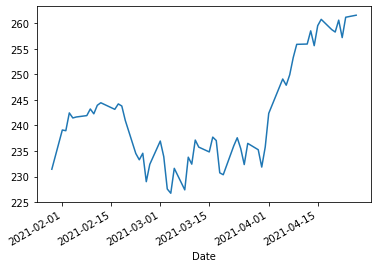

In [4]:
# Plot MSFT closing prices in 2021

hist['Close'].plot()

## Download AAPLE stocks data from Yahoo Finance

In [5]:
# Download stock data then export as CSV

data_appl = yf.download("AAPL", start="2020-01-01", end="2021-04-23")

data_appl.to_csv('aapl.csv')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

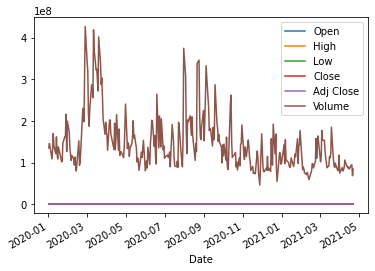

In [6]:
#APPLE from Jan1 2020

#volume
data_appl.plot()

<AxesSubplot:xlabel='Date'>

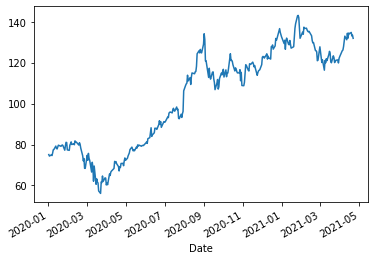

In [8]:
#Apple historical prices
data_appl['Close'].plot()

## Get stock data for major economic indexes

In [9]:
# Tickers list
# Add or delete any ticker from the list to get your desired ticker live data
tickers=['^DJI','^IXIC','^NYA']

In [10]:
#download data
data_stocks = yf.download(tickers, start="2020-01-01", end="2021-04-27")
data_stocks.to_csv('data_stocks.csv')

[*********************100%***********************]  3 of 3 completed


In [11]:
def get_price(stock, start, end):
    return pdr.get_data_yahoo(stock, start, end)['Adj Close']

prices = pd.DataFrame({n: get_price(n, "2020-01-01", "2021-04-27") for n in tickers})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
prices.tail()

,^DJI,^IXIC,^NYA
Date,,,
2021-04-20,33821.300781,13786.269531,15944.610352
2021-04-21,34137.308594,13950.219727,16121.610352
2021-04-22,33815.898438,13818.410156,16030.620117
2021-04-23,34043.488281,14016.809570,16206.000000
2021-04-26,33981.570312,14138.775391,16241.206055


<AxesSubplot:xlabel='Date'>

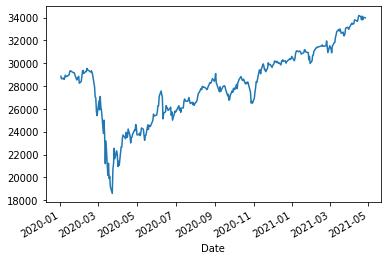

In [13]:
#Dow from Jan1 2020

prices['^DJI'].plot()

In [14]:
#Dow from April 15 2021
dow = pdr.get_data_yahoo('^DJI', '2021-04-15')
dow['Close']

[*********************100%***********************]  1 of 1 completed


Date
2021-04-15    34035.988281
2021-04-16    34200.671875
2021-04-19    34077.628906
2021-04-20    33821.300781
2021-04-21    34137.308594
2021-04-22    33815.898438
2021-04-23    34043.488281
2021-04-26    33981.570312
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

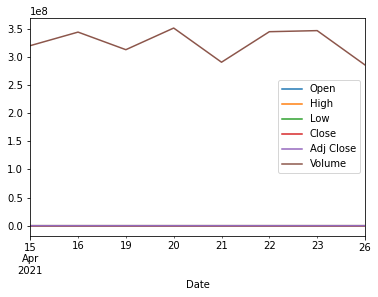

In [15]:
dow.plot()

<AxesSubplot:xlabel='Date'>

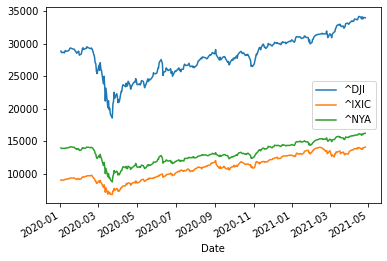

In [16]:
#multiple plots from Jan1 2020

prices[['^DJI','^IXIC','^NYA']].plot()